In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 2.Exploring the Columns and Datatypes

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Checking for NaN values in the Dataframe

In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Analysis 1: Checking for the Major Account Category that does Fraud Transactions in isFraud Column

## Converting Origin and Destination names to Character

In [10]:
df['nameDest'] = df['nameDest'].apply(lambda x:x[0])

In [12]:
df['nameOrig'] = df['nameOrig'].apply(lambda x:x[0])

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0


## Filtering to get only Isfraud from Customer Transactions

In [28]:
filt_Customer = (df['isFraud'] == 1) & (df['nameDest'] == 'C')

In [29]:
isfraud_Customer = df.loc[filt_Customer].copy()

In [33]:
isfraud_Customer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C,181.0,0.0,C,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C,181.0,0.0,C,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C,2806.0,0.0,C,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C,2806.0,0.0,C,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C,20128.0,0.0,C,0.0,0.0,1,0


In [42]:
(isfraud_Customer['nameOrig'] == 'C').value_counts()

True    8213
Name: nameOrig, dtype: int64

In [41]:
(isfraud_Customer['nameOrig'] == 'M').value_counts()

False    8213
Name: nameOrig, dtype: int64

## Filtering to get Isfraud from Merchant Transactions

In [34]:
filt_Merchant = (df['isFraud'] == 1) & (df['nameDest'] == 'M')

In [35]:
isfraud_Merchant = df.loc[filt_Merchant].copy()

In [43]:
isfraud_Merchant.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


### No isFraud transactions between Merchant Accounts

#  "Insight 1: From the Above Observations the isFraud Transactions takes place  from Customer to Customer account ".

In [196]:
df1 = pd.read_csv('./Data/Fraud.csv')
df1['nameOrig'] = df1['nameOrig'].apply(lambda x:x[0])
df1['nameDest'] = df1['nameDest'].apply(lambda x:x[0])
df1.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0


In [197]:
df1['Sender_Reciever'] = df1['nameOrig'] + '-' + df1['nameDest']

In [198]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Sender_Reciever
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0,C-M
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0,C-M
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0,C-C
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0,C-C
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0,C-M


In [199]:
df1['Sender_Reciever'].value_counts()

C-C    4211125
C-M    2151495
Name: Sender_Reciever, dtype: int64

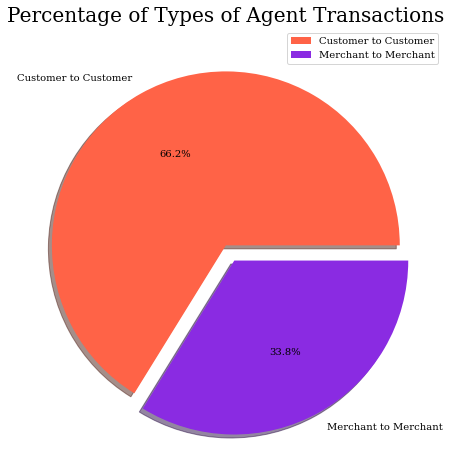

In [207]:
size = list(df1['Sender_Reciever'].value_counts())
labels = ['Customer to Customer', 'Merchant to Merchant']
colors = ['tomato', 'blueviolet']
explode = [0,0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

plt.subplots(figsize = (8,8))
plt.pie(size,labels = labels, colors = colors, explode = explode, shadow = True,autopct = lambda pct: func(pct, size), labeldistance = 1.1)

plt.title('Percentage of Types of Agent Transactions', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend()
plt.show()

# Analysis 2: Checking for the Major Account Category that does Fraud Transactions in isFlaggedFraud Column

In [47]:
filt_isFlagged = (df['isFlaggedFraud'] == 1) 

In [44]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [49]:
df.loc[filt_isFlagged]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C,4953893.08,4953893.08,C,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C,1343002.08,1343002.08,C,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C,536624.41,536624.41,C,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C,4892193.09,4892193.09,C,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C,19585040.37,19585040.37,C,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C,19585040.37,19585040.37,C,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C,3576297.10,3576297.10,C,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C,353874.22,353874.22,C,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C,2542664.27,2542664.27,C,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C,10399045.08,10399045.08,C,0.0,0.0,1,1


In [62]:
filt_isFlagged1 = ((df['nameDest'] == 'M') &  (df["oldbalanceOrg"] == df["newbalanceOrig"]))

In [63]:
df.loc[filt_isFlagged1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C,0.0,0.0,M,0.0,0.0,0,0
30,1,PAYMENT,3448.92,C,0.0,0.0,M,0.0,0.0,0,0
31,1,PAYMENT,4206.84,C,0.0,0.0,M,0.0,0.0,0,0
32,1,PAYMENT,5885.56,C,0.0,0.0,M,0.0,0.0,0,0
33,1,PAYMENT,5307.88,C,0.0,0.0,M,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6355956,709,PAYMENT,17274.64,C,0.0,0.0,M,0.0,0.0,0,0
6355957,709,PAYMENT,20380.42,C,0.0,0.0,M,0.0,0.0,0,0
6355981,709,PAYMENT,5387.46,C,0.0,0.0,M,0.0,0.0,0,0
6355984,709,PAYMENT,3837.05,C,0.0,0.0,M,0.0,0.0,0,0


# Insight 2: The Database doesnt show the balance sheet between Merchant to Merchant Transactions and Fraud transactions Takes place only between Customers 

In [210]:
df1['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

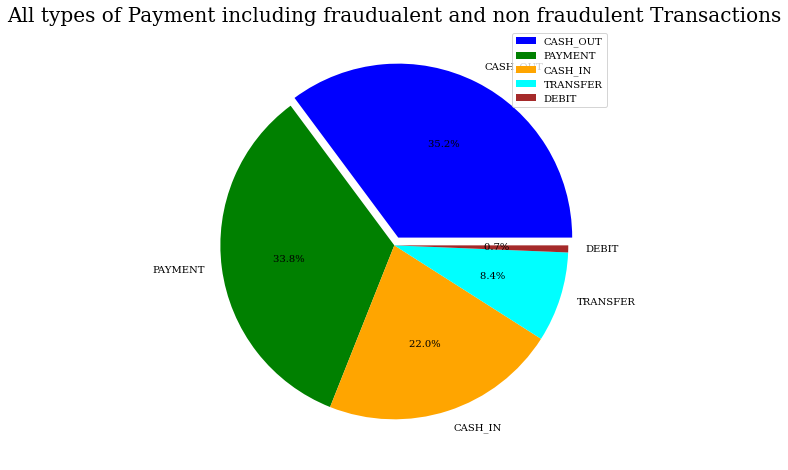

In [228]:
size = list(df1['type'].value_counts())
labels = ['CASH_OUT', 'PAYMENT', 'CASH_IN','TRANSFER','DEBIT']
colors = ['blue', 'green','orange','cyan','brown']
explode = [0.05,0,0,0,0]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}% ".format(pct, absolute)

plt.subplots(figsize = (8,8))
plt.pie(size,labels = labels, colors = colors,explode = explode, shadow = False,autopct = lambda pct: func(pct, size), labeldistance = 1.1)

plt.title('All types of Payment including fraudualent and non fraudulent Transactions', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend()
plt.show()

# Analysis 2: Exploring more in Detail about Fraud Transactions between Customer Account

In [66]:
(isfraud_Customer['isFlaggedFraud'] == 1).value_counts()

False    8197
True       16
Name: isFlaggedFraud, dtype: int64

### - 16 times Fraud Agents tried to White Wash other Peoples Account

In [67]:
isfraud_Customer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C,181.00,0.0,C,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C,181.00,0.0,C,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C,2806.00,0.0,C,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C,2806.00,0.0,C,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C,20128.00,0.0,C,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C,339682.13,0.0,C,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C,6311409.28,0.0,C,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C,6311409.28,0.0,C,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C,850002.52,0.0,C,0.00,0.00,1,0


In [88]:
isfraud_Customer['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [91]:
isfraud_Customer['amount'].mean()

1467967.299140387

In [69]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [72]:
isfraud_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8213 non-null   int64  
 1   type            8213 non-null   object 
 2   amount          8213 non-null   float64
 3   nameOrig        8213 non-null   object 
 4   oldbalanceOrg   8213 non-null   float64
 5   newbalanceOrig  8213 non-null   float64
 6   nameDest        8213 non-null   object 
 7   oldbalanceDest  8213 non-null   float64
 8   newbalanceDest  8213 non-null   float64
 9   isFraud         8213 non-null   int64  
 10  isFlaggedFraud  8213 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 770.0+ KB


# Insight 3: The Fraudulent Transaction types are "Cash_Out" and "Transfer" only

In [186]:
isfraud_Customer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C,181.0,0.0,C,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C,181.0,0.0,C,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C,2806.0,0.0,C,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C,2806.0,0.0,C,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C,20128.0,0.0,C,0.0,0.0,1,0


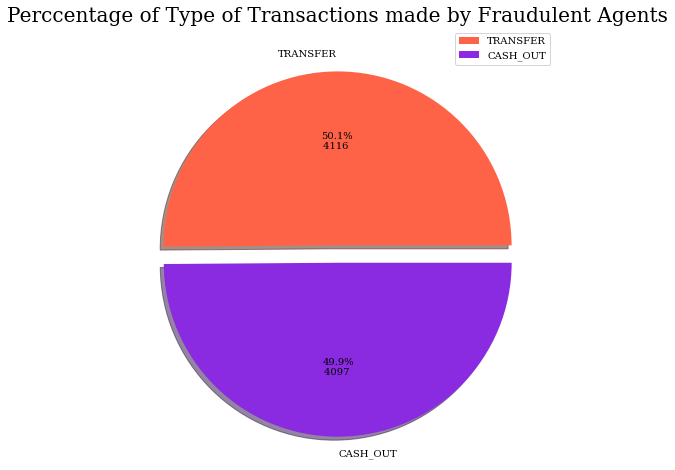

In [203]:
size = list(isfraud_Customer['type'].value_counts())
labels = ['TRANSFER', 'CASH_OUT']
colors = ['tomato', 'blueviolet']
explode = [0,0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n{:d} ".format(pct, absolute)

plt.subplots(figsize = (8,8))
plt.pie(size,labels = labels, colors = colors, explode = explode, shadow = True,autopct = lambda pct: func(pct, size), labeldistance = 1.1)

plt.title('Perccentage of Type of Transactions made by Fraudulent Agents', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend()
plt.show()

# Analysis 3: Checking for Authentic Transactions between Customer Accounts 

In [73]:
filt_Customer_1 = (df['isFraud'] == 0) & (df['nameDest'] == 'C')

In [74]:
Authentic_Customer = df.loc[filt_Customer_1].copy()

In [92]:
Authentic_Customer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C,41720.00,36382.23,C,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C,4465.00,0.00,C,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,C,15325.00,0.00,C,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C,705.00,0.00,C,22425.0,0.00,0,0
21,1,DEBIT,9302.79,C,11299.00,1996.21,C,29832.0,16896.70,0,0
22,1,DEBIT,1065.41,C,1817.00,751.59,C,10330.0,0.00,0,0
24,1,TRANSFER,311685.89,C,10835.00,0.00,C,6267.0,2719172.89,0,0
41,1,DEBIT,5758.59,C,32604.00,26845.41,C,209699.0,16997.22,0,0
42,1,CASH_OUT,110414.71,C,26845.41,0.00,C,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C,1942.02,0.00,C,70253.0,64106.18,0,0


In [93]:
Authentic_Customer['amount'].mean()

262732.87620428024

In [95]:
Authentic_Customer.shape

(4202912, 11)

In [96]:
isfraud_Customer.shape

(8213, 11)

In [126]:
Auth_C_to_M = (df['isFraud'] == 0) & (df['nameDest'] == 'M') &(df['nameOrig'] == 'C')

In [141]:
authentic_Customer_to_Merchant = df[Auth_C_to_M].copy()

In [142]:
authentic_Customer_to_Merchant.shape

(2151495, 11)

In [146]:
filt_M_to_M = (df['isFraud'] == 0) & (df['nameDest'] == 'M') &(df['nameOrig'] == 'M')

In [147]:
authentic_Merchant_to_Merchant = df[filt_M_to_M].copy()

In [148]:
authentic_Merchant_to_Merchant

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [135]:
fraud_C_to_M = (df['isFraud'] == 1) & (df['nameDest'] == 'M') &(df['nameOrig'] == 'C')

In [138]:
fraud_Customer_to_Merchant = df[fraud_C_to_M].copy()

In [139]:
fraud_Customer_to_Merchant.shape

(0, 11)

# Insight 4: There is no Fraud transactions between Customers and Merchants 

## All the fraud occurs between Customer to Customer Transactions

### One hot Encoding

In [149]:
from sklearn import preprocessing

In [151]:
le = preprocessing.LabelEncoder()

In [161]:
oe = preprocessing.OrdinalEncoder()

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [154]:
df['type'] = le.fit_transform(df['type'])

In [163]:
df['nameDest'] = le.fit_transform(df['nameDest'])

In [164]:
df['nameOrig'] = le.fit_transform(df['nameOrig'])

In [165]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,0,170136.00,160296.36,1,0.00,0.00,0,0
1,1,3,1864.28,0,21249.00,19384.72,1,0.00,0.00,0,0
2,1,4,181.00,0,181.00,0.00,0,0.00,0.00,1,0
3,1,1,181.00,0,181.00,0.00,0,21182.00,0.00,1,0
4,1,3,11668.14,0,41554.00,29885.86,1,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,0,339682.13,0.00,0,0.00,339682.13,1,0
6362616,743,4,6311409.28,0,6311409.28,0.00,0,0.00,0.00,1,0
6362617,743,1,6311409.28,0,6311409.28,0.00,0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,0,850002.52,0.00,0,0.00,0.00,1,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


# Train Test Split Method

In [167]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [168]:
list_data = ['type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']

In [170]:
X = df[list_data]
y = df['isFraud']

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [173]:
X_train.shape

(5090096, 8)

In [175]:
y_train.shape

(5090096,)

In [176]:
X_test.shape

(1272524, 8)

In [178]:
y_test.shape

(1272524,)

# Training and Using the Model for Prediction

In [179]:
model.fit(X_train,y_train)

LogisticRegression()

In [180]:
y_predict = model.predict(X_test)

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy_score(y_test, y_predict, normalize = True)

0.9976849159622923